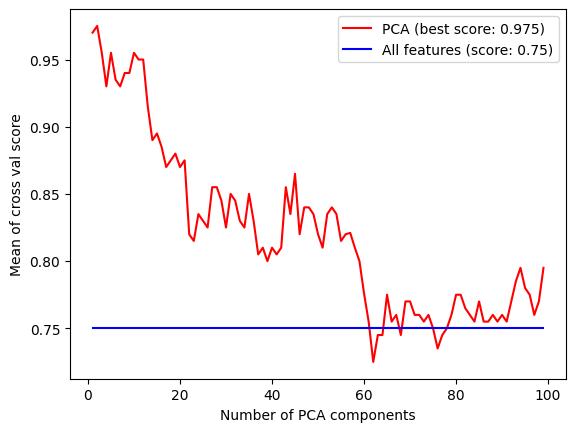

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, neighbors, decomposition

x0 = np.random.uniform(0, 100, 100)
x1 = np.random.uniform(200, 300, 100)

x = np.concatenate((x0, x1)).reshape(-1, 1)
y = np.random.uniform(0, 300, 200).reshape(-1, 1)
z = np.array([np.random.uniform(-100, 100, 200) for _ in range(200)]).T

target0 = np.zeros(100)
target1 = np.ones(100)
target = np.concatenate((target0, target1))

attributes = np.concatenate((x, y, z), axis=1)

knn = neighbors.KNeighborsClassifier()

pca_mean_results = {}
for components in range(1, 100):
  pca = decomposition.PCA(n_components=components)
  pca_components = pca.fit_transform(attributes)
  pca_results = model_selection.cross_val_score(knn, pca_components, target, cv=3)
  pca_mean_results[components] = float(round(pca_results.mean(), 3))
best_pca_result = max(pca_mean_results.values())

results = model_selection.cross_val_score(knn, attributes, target, cv=3)
all_features_mean = round(results.mean(), 3)

plt.plot(pca_mean_results.keys(), pca_mean_results.values(), color='red')
plt.plot(pca_mean_results.keys(), [all_features_mean]*len(pca_mean_results.keys()), color='blue')
plt.legend([f'PCA (best score: {best_pca_result})', f'All features (score: {all_features_mean})'])
plt.xlabel('Number of PCA components')
plt.ylabel('Mean of cross val score')
plt.show()